<a href="https://colab.research.google.com/github/fholken/curso_agentes_ai/blob/main/8_Chatbot_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

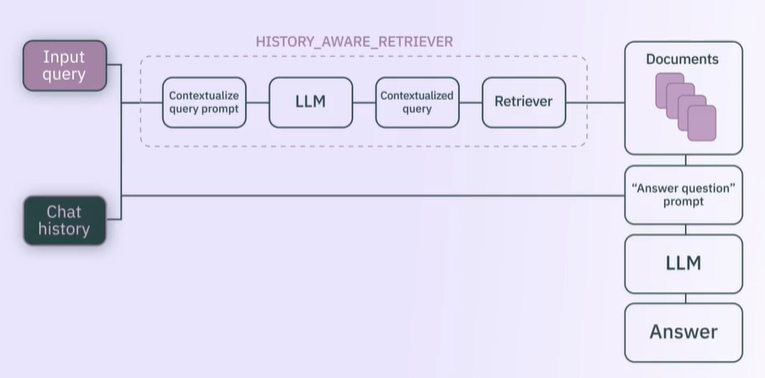

In [1]:
import getpass
import os

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key: ")

OpenAI API Key: ··········


In [2]:
!pip install -qU langchain langchain_community unstructured langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [3]:
!pip install -qU pypdf

* Importamos las librerias necesarias para cargar los documentos





In [4]:
from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader

* Cargamos los documentos desde google Drive, en una variable **loader**

In [6]:
loader = DirectoryLoader(
    "/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs",
    glob="**/*.pdf",
    loader_cls=PyPDFLoader
    )

* los guardamos en la variable **pages**

In [7]:
pages = loader.load()

* con esto podemos ver los documentos guardados

In [8]:
pages

[Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 0}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 1}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 2}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 3}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 4}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 5}, page

* Tenemos que dividir los PDFs en fragmentos (chunk) mas pequeños

In [9]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 200
)

splits = text_splitter.split_documents(pages)

* Vemos como quedaron divididos los datos

In [10]:
splits

[Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/guia de laboratorio PH.pdf', 'page': 0}, page_content='ESCUELANORMALSUPERIORANTIOQUEÑA Noveno\nCIENCIAEINNOVACIÓNGUÍADELABORATORIO\nINDICADORESDEpH\n1.OBJETIVOS 1.1. Determina la acidez y la basicidad de compuestos dados, de manera cualitativa (colorimetría) y cuantitativa (escala de pH). 1.2.Objetivos Específicos: a. Conocer la técnica para preparar un indicador casero. b. Comprender e identificar la utilidad de la determinación del nivel de pH de diferentes sustancias. c. Identificar el pH de sustancias domésticas para reconocer el nivel de acidez y basicidad de las mismas. \n 2.MARCO CONCEPTUAL:'),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/guia de laboratorio PH.pdf', 'page': 0}, page_content='2.MARCO CONCEPTUAL: \n ÁCIDOS Y BASES : Son dos tipos de compuestos químicos que presentan características opuestas. Los ácidos tienen un sabor agrio, c

In [11]:
splits[1]

Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/guia de laboratorio PH.pdf', 'page': 0}, page_content='2.MARCO CONCEPTUAL: \n ÁCIDOS Y BASES : Son dos tipos de compuestos químicos que presentan características opuestas. Los ácidos tienen un sabor agrio, colorean de rojo el tornasol (tinte rosa que se obtiene de determinados líquenes) y reaccionan con ciertos metales desprendiendo hidrógeno. Las bases tienen sabor amargo, colorean el tornasol de azul y tienen tacto jabonoso. Cuando se combina una disolución acuosa de un ácido con otra de una base, tiene lugar una reacción de neutralización. Esta reacción en la que, generalmente, se forman agua y sal, es muy rápida. Así, el ácido sulfúrico y el hidróxido de sodio NaOH, producen agua y sulfato de sodio: \n H2SO4 + 2NaOH —------- 2H2O + Na2SO4')

En este momento **Langchain** ya tiene los documentos cargados y separados en pequeños chunk de 1000 tokens, el paso a seguir es con la vectorizacion de estos datos. Es decir, cada uno de los chunk lo debemos llevar a una **vector independiente**, y despues llevarlo a un **espacio vectoria** o una **base de datos vectorial**

* Instalamos chroma "Esta es nuestra basa de datos vectorial"

In [12]:
!pip install -qU langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.6 MB/s eta 0:00:0

1. Estamos llamando un modelo para vectorizar (**Vamos en este paso**)
2. Llamamos un modelo para la respuesta

In [13]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

# Lamacenamos los documentos en la DB
vectorstores = Chroma.from_documents(
    documents = splits,
    embedding = OpenAIEmbeddings()
)

# Convertimos a un recuperador de información

El **"retriever"** es un componente clave en sistemas de generación de texto como los que se utilizan en los chatbots RAG. Su función principal es recuperar información relevante de un espacio vectorial donde se almacena documentación previamente cargada. Esto permite que el modelo busque respuestas contextuales basadas en las preguntas del usuario, utilizando fragmentos de texto (chunks) que han sido vectorizados. En el contexto de LangChain, el retriever facilita la conexión entre el modelo de lenguaje y los datos relevantes almacenados.

1. as_retriever: Esto convierte el almacenamiento de vectores en algo que puede "buscar" información relevante. Por ejemplo:

* Cuando le haces una pregunta, este recuperador buscará en los documentos almacenados y encontrará aquellos más relacionados con tu consulta.
* Es como un motor de búsqueda que entiende el significado del texto.

2. retriever: Es el objeto que usaremos para buscar información entre los documentos.

In [14]:
retriever = vectorstores.as_retriever()

* Pasaremos la informacion del system_promt: que es **rol** que queremos que tome o actue este modelo
* Tambien le pasaremos el **contexto** en un variable, este contexto se toma de los vectores que ya tenemos en la base de datos

In [15]:
system_promt = (
    'Eres un asistente que devuelve informacion de multiples PDFs, ademas incluye emojis a cada una de las respuestas. Tienes el siguiente {context}'
)

1. Estamos llamando un modelo para vectorizar
2. Llamamos un modelo para la respuesta (Vamos en este paso)

In [16]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model = 'gpt-4o',
    temperature = 0,
    max_tokens = 150
)

Ahora vamos a importar lo necesario:

* **ChatPromptTemplate**: Para pasarle nueva informacion al modelo
* **MessagesPlaceholder**: Para recibir inputs

In [17]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# Esto es para manejar todo el historial
from langchain.chains import create_history_aware_retriever, create_retrieval_chain

El propósito del prompt contextualizado que mencionas es establecer un conjunto de reglas claras para un sistema de inteligencia artificial (como un chatbot) sobre cómo debe comportarse al generar respuestas.

In [18]:
contextualize_q_system_prompt = (
    "Responde únicamente usando la información proporcionada por la base de datos vectorial, "
    "el historial de chat y la última pregunta del usuario. "
    "Si no encuentras información relevante en estas fuentes, responde con: "
    "'No tengo suficiente información para responder a tu pregunta'. "
    "Mantén un tono profesional en tus respuestas."
)

# ¿Qué es contextualize_q_prompt?

contextualize_q_prompt es una plantilla de mensaje (prompt) para un modelo de inteligencia artificial, como GPT. Define cómo se estructura la entrada que se enviará al modelo para que genere una respuesta. En este caso, está construida usando ChatPromptTemplate.from_messages.

# Desglose del código

a. **ChatPromptTemplate.from_messages**

Este método crea un **prompt compuesto por múltiples mensajes**. Cada mensaje tiene un rol (por ejemplo, system, human) y un contenido específico.

En este caso, la entrada al modelo está compuesta por tres elementos:

  1. Un mensaje del sistema (system).
  2. Un historial de chat (MessagesPlaceholder).
  3. La última entrada del usuario (human).

b. **Mensaje del sistema**

```
('system', contextualize_q_system_prompt)
```

  * Rol ('system'): El mensaje del sistema es una instrucción fija que le dice al modelo cómo debe comportarse.
  * Contenido (contextualize_q_system_prompt): Este contiene las reglas definidas previamente, como:
    * Responder solo según el historial de chat, la base de datos y la última pregunta.
    * Mantener un tono profesional.
    * No inventar información fuera del contexto.

Ejemplo de mensaje del sistema:



```
Responde únicamente usando la información proporcionada por la base de datos vectorial, el historial de chat y la última pregunta del usuario. Si no encuentras información relevante en estas fuentes, responde con: "No tengo suficiente información para responder a tu pregunta". Mantén un tono profesional en tus respuestas.
```

c. **Historial del chat**

```
MessagesPlaceholder('chat_history')
```

  * MessagesPlaceholder: Es un marcador que se reemplazará dinámicamente con el historial de mensajes de la conversación.
  * Propósito: Permite al modelo conocer lo que ya se ha discutido en la conversación para dar respuestas contextuales.

Por ejemplo, si el historial contiene:

```
Usuario: ¿Qué es un vector?
Asistente: Es una estructura matemática utilizada para representar magnitudes y direcciones.
```

El modelo tendrá esta información para generar respuestas más relevantes.

d. **Entrada del usuario**

```
('human', '{input}')
```

  * Rol ('human'): Representa la pregunta o mensaje más reciente del usuario.
  * Contenido ('{input}'): Un marcador de posición que se reemplazará con el texto actual del usuario.

Ejemplo: Si el usuario pregunta:

```
¿Puedes explicar cómo calcular un vector unitario?
```

El valor de {input} será:

```
¿Puedes explicar cómo calcular un vector unitario?
```

## Ejemplo completo en acción

Supongamos que tenemos:

  * Mensaje del sistema:

```
Responde únicamente usando la información proporcionada por la base de datos vectorial, el historial de chat y la última pregunta del usuario.
```
  * Historial de chat:

```
Usuario: ¿Qué es un vector?
Asistente: Es una estructura matemática utilizada para representar magnitudes y direcciones.
```

  * Última pregunta del usuario:

```
¿Puedes explicar cómo calcular un vector unitario?
```

El prompt que recibe el modelo será algo como:

```
System: Responde únicamente usando la información proporcionada por la base de datos vectorial, el historial de chat y la última pregunta del usuario.
Chat History:
Usuario: ¿Qué es un vector?
Asistente: Es una estructura matemática utilizada para representar magnitudes y direcciones.
Human: ¿Puedes explicar cómo calcular un vector unitario?
Esto asegura que el modelo tenga toda la información relevante para responder correctamente.
```

In [20]:
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        (
            'system', contextualize_q_system_prompt
        ),
        MessagesPlaceholder('chat_history'),
        ('human', '{input}')
    ]
)


# Importaciones


```
from langchain.chains import create_history_aware_retriever, create_retrieval_chain
```

* **create_history_aware_retriever:**
Es una función de la librería LangChain que se utiliza para crear un objeto de recuperación de información (retriever) que:

  * Tiene en cuenta el historial de la conversación.
  * Utiliza un modelo de lenguaje (LLM, por sus siglas en inglés) para recuperar información más relevante de una base de datos vectorial.

* **create_retrieval_chain:**
Es otra función de LangChain que crea una cadena de recuperación completa. Una cadena de recuperación:

  * Integra el sistema de recuperación de documentos con un modelo de lenguaje.
  * Se usa para responder preguntas de manera contextual basándose en datos previamente indexados.

# Creación del history_aware_retriever

```
history_aware_retriever = create_history_aware_retriever(
    llm, retriever, contextualize_q_prompt
)
```

Este fragmento crea un retriever contextual que tiene en cuenta el historial de la conversación. Vamos a desglosarlo:

## Componentes de entrada

  1. llm **(Language Model):**

    * Este es el modelo de lenguaje que se utiliza para interpretar las preguntas y sugerir qué información es más relevante.
    * Por ejemplo: OpenAI, GPT-4, o cualquier modelo compatible con LangChain.
  2. retriever:

    * Es el objeto encargado de buscar documentos relevantes en la base de datos vectorial.
    * Funciona recuperando los documentos más similares a la consulta del usuario mediante embeddings.
    * Este podría ser el Chroma que configuraste anteriormente:
```
retriever = vectorstores.as_retriever()
```

  3. contextualize_q_prompt:

    * Es el prompt que define las reglas para cómo se debe contextualizar la pregunta del usuario.
    * Le dice al sistema que use:
      * El historial de chat.
      * Los documentos relevantes de la base de datos.
      * La última pregunta del usuario.
    * Esto asegura que las respuestas sean contextualmente precisas.


---

# Qué hace create_history_aware_retriever
* Combina el modelo de lenguaje (llm), el sistema de recuperación (retriever) y el prompt (contextualize_q_prompt) para crear un retriever que respeta el historial de la conversación.

* Este history_aware_retriever:
  1. Recupera documentos relevantes de la base de datos vectorial usando el retriever.
  2. Integra el historial de chat en el contexto para mejorar la precisión de las respuestas.
  3. Usa el LLM para interpretar las consultas con mayor profundidad, aplicando las instrucciones del prompt.

---

# Ejemplo del flujo
Supongamos que el usuario pregunta:


    "¿Qué es el aprendizaje automático?"

1. Consulta inicial:

  * El history_aware_retriever analiza la pregunta del usuario.
  * Usa el historial de chat para considerar las interacciones previas.

2. Búsqueda en la base de datos vectorial:

  * Utiliza el retriever para buscar documentos relacionados en la base de datos vectorial (almacenada con Chroma).

3. Contextualización de la consulta:

  * Combina la información recuperada, el historial de chat, y la pregunta actual.
  * Aplica las instrucciones definidas en contextualize_q_prompt.

4. Respuesta precisa:

  * Devuelve los documentos relevantes al modelo (llm), que genera una respuesta profesional basada en las instrucciones del prompt.

In [21]:
history_aware_retriever = create_history_aware_retriever(
    llm, retriever, contextualize_q_prompt
)

# Importación


```
from langchain.chains.combine_documents import create_stuff_documents_chain
```

Esta línea importa la función create_stuff_documents_chain de LangChain. Esta función se utiliza para crear una cadena (chain) que:

* Combina múltiples documentos en un solo contexto.
* Usa un modelo de lenguaje (LLM) para responder preguntas basándose en esos documentos.

En otras palabras, esta cadena permite tomar una lista de documentos recuperados (por ejemplo, desde un vectorstore), procesarlos juntos, y generar una respuesta contextualizada.

In [22]:
from langchain.chains.combine_documents import create_stuff_documents_chain

# Creación del qa_prompt

Este bloque define el prompt para la cadena de preguntas y respuestas (question_answer_chain). Veamos cada parte:

#### ('system', system_prompt)
* Este es el mensaje inicial del sistema. Define el comportamiento del modelo y le da instrucciones específicas.

* Ejemplo:



```
system_prompt = "Responde basándote únicamente en los documentos proporcionados. Sé conciso y profesional."
```

#### MessagesPlaceholder('chat_history')

* Inserta un espacio dinámico para el historial de chat entre el usuario y el asistente.
* Esto asegura que el modelo tenga acceso al contexto completo de la conversación anterior.

#### ('human', '{input}')

* Representa el mensaje actual del usuario, que se pasa dinámicamente al prompt.
* El marcador {input} se reemplazará con la pregunta o entrada específica del usuario.

##Ejemplo del qa_prompt completo:

Supongamos que:

* system_prompt dice: "Responde basándote únicamente en los documentos."
* Historial de chat:
    * Usuario: "¿Qué es el aprendizaje automático?"
    * Asistente: "Es una subárea de la inteligencia artificial..."
* Entrada actual: "¿Cuáles son los beneficios?"

El prompt resultante sería algo así:

```
[system] Responde basándote únicamente en los documentos.
[chat_history]
- Usuario: ¿Qué es el aprendizaje automático?
- Asistente: Es una subárea de la inteligencia artificial...
[human] ¿Cuáles son los beneficios?
```



In [23]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ('system', system_promt),
        MessagesPlaceholder('chat_history'),
        ('human', '{input}')
    ]
)

# Creación de la cadena de preguntas y respuestas

## ¿Qué hace create_stuff_documents_chain?
* Combina documentos: Toma múltiples documentos (recuperados previamente, por ejemplo, desde un vectorstore) y los presenta al modelo como un solo "bloque de información".
* Genera respuestas: Utiliza el modelo de lenguaje (llm) para generar respuestas basadas en esos documentos y en el prompt proporcionado (qa_prompt).

In [24]:
question_answer_chain = create_stuff_documents_chain(
    llm,
    qa_prompt
)

# ¿Qué es RAG (Retrieval-Augmented Generation)?

**RAG** es un enfoque donde:

1. Se recupera información relevante desde una base de datos o índice vectorial (usando un retriever).
2. Esa información recuperada se combina con un modelo de lenguaje (LLM) para **generar respuestas contextualizadas.**

En este caso, la línea que defines implementa este flujo combinando dos elementos principales:

* Un retriever que tiene en cuenta el historial de la conversación.
* Una cadena de generación de respuestas.

# La función create_retrieval_chain

Esta función crea una **cadena completa de recuperación y generación de respuestas**, donde:

1. history_aware_retriever:

  * Recupera documentos relevantes desde una base de datos vectorial.
  * Tiene en cuenta el historial de la conversación para contextualizar mejor la búsqueda.

2. question_answer_chain:

  * Combina los documentos recuperados y la entrada del usuario.
  * Usa un modelo de lenguaje (LLM) para generar una respuesta basada en los documentos.

El resultado es una **cadena** (rag_chain) que ejecuta ambos pasos de manera integrada.

In [25]:
rag_chain = create_retrieval_chain(
    history_aware_retriever,
    question_answer_chain
)

# Importaciones

Estas líneas importan las clases necesarias para gestionar el historial de mensajes de chat y combinarlas con el flujo de trabajo de RAG:

* **BaseChatMessageHistory**: Esta es una clase base que representa el historial de mensajes de un chat.
* **RunnableWithMessageHistory**: Una clase que combina una cadena (chain) de procesamiento (en este caso, rag_chain) con el historial de mensajes. Es decir, gestiona tanto el flujo de datos como el contexto de la conversación.
* **ChatMessageHistory**: Una implementación específica de BaseChatMessageHistory que proporciona funcionalidad concreta para almacenar y recuperar mensajes de un chat.

# Variable store

Aquí, store es un diccionario vacío que almacenará el historial de los mensajes de cada sesión. El índice de este diccionario es el session_id, que se utilizará para asociar y recuperar el historial de chat de sesiones específicas.

# Función get_session_history

Esta función tiene como objetivo obtener el historial de mensajes de una sesión específica, identificada por session_id.

1. Verifica si el session_id ya está en store: Si no existe, crea una nueva instancia de ChatMessageHistory y la almacena en el diccionario store bajo la clave session_id.
2. Devuelve el historial: La función siempre devuelve el historial de mensajes correspondiente al session_id. Si no existía antes, crea uno nuevo, de lo contrario, lo recupera.

**¿Qué es ChatMessageHistory?** ChatMessageHistory es una implementación que permite almacenar los mensajes de un chat de manera ordenada y persistente. Cada vez que el usuario envíe un nuevo mensaje, se añadirá al historial.

In [26]:
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory

store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]

# Creación de conversational_rag_chain

Aquí se está creando una instancia de RunnableWithMessageHistory. Vamos a ver qué hace:

* rag_chain: Este es el flujograma de recuperación y generación de respuestas (RAG), que combina la recuperación de documentos con un modelo generador de respuestas. Ya hemos visto cómo funciona anteriormente.

* get_session_history: Es la función que obtiene el historial de chat para una sesión específica. Se utiliza para asegurar que el contexto de la conversación esté disponible para generar respuestas más precisas y coherentes.

* **Parámetros de claves:**

    * input_messages_key='input': La clave para acceder a los mensajes de entrada del usuario. Esto indica que cuando se pase la entrada al rag_chain, se usará la clave 'input' para obtener el mensaje.
    * history_messages_key='chat_history': La clave para acceder al historial de mensajes, que será utilizado por el modelo para generar respuestas basadas en el contexto anterior de la conversación.
    * output_messages_key='answer': La clave para acceder a la respuesta generada por el modelo. Cuando el modelo genere la respuesta, será almacenada bajo esta clave.

In [27]:
conversational_rag_chain = RunnableWithMessageHistory(
    rag_chain,
    get_session_history,
    input_messages_key='input',
    history_messages_key='chat_history',
    output_messages_key='answer'
)

In [28]:
conversational_rag_chain.invoke(
    {
        'input': 'Cuales son los estados de la materia?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'Los estados de la materia son tres: sólido, líquido y gas. 🌟 En este experimento, el acetato de sodio cambia de un estado líquido a sólido de manera instantánea, lo que lo hace muy interesante y divertido de observar. 🧪✨'

In [29]:
conversational_rag_chain.invoke(
    {
        'input': 'Cual es el estado actual de la pedagogia en nuestro medio?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'El estado actual de la pedagogía en nuestro medio se caracteriza por una serie de tendencias y desafíos que reflejan la evolución de la educación en respuesta a las necesidades contemporáneas. 📚✨\n\n1. **Integración Tecnológica**: La tecnología se ha convertido en una herramienta esencial en la educación, facilitando el aprendizaje a través de plataformas digitales, recursos en línea y aulas virtuales. 💻🌐\n\n2. **Enfoque en Competencias**: Se está moviendo hacia un enfoque basado en competencias, donde se prioriza el desarrollo de habilidades prácticas y aplicables en lugar de solo la memorización de contenidos. 🧠🔧\n\n3. **Educación Inclusiva**: Hay un creciente énf'

In [30]:
conversational_rag_chain.invoke(
    {
        'input': '¿Como se mide el Ph en el agua?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'El pH del agua se puede medir de varias maneras, cada una con su propio nivel de precisión y facilidad de uso. Aquí te presento algunas de las más comunes: 💧🔍\n\n1. **Papel Tornasol**: Es una forma sencilla y rápida de medir el pH. Simplemente sumerges una tira de papel tornasol en el agua y observas el cambio de color. El color resultante se compara con una escala de colores para determinar el pH. 🌈📄\n\n2. **Medidores de pH Digitales**: Estos dispositivos electrónicos proporcionan una lectura precisa del pH. Solo necesitas sumergir el electrodo en el agua y el medidor mostrará el valor del pH'

In [31]:
conversational_rag_chain.invoke(
    {
        'input': '¿En que año murio simon bolivar?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'Simón Bolívar, el libertador de América, falleció el 17 de diciembre de 1830. 🗓️🇻🇪 Su legado sigue siendo una parte fundamental de la historia de América Latina. 🌟'

In [32]:
conversational_rag_chain.invoke(
    {
        'input': '¿Cuales son las diferencia o mejoras que tiene laravel 11 frente a laravel 10?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'Laravel 11 aún no ha sido lanzado, por lo que no hay detalles oficiales sobre las diferencias o mejoras específicas en comparación con Laravel 10. Sin embargo, Laravel, como framework, suele introducir mejoras en rendimiento, nuevas características, y actualizaciones de seguridad con cada nueva versión. 🚀🔧\n\nPara estar al tanto de las novedades, te recomendaría seguir el blog oficial de Laravel o su repositorio en GitHub, donde se publican las actualizaciones y cambios una vez que una nueva versión está disponible. 📢📘\n\nSi tienes alguna otra pregunta o necesitas información sobre versiones anteriores, ¡estaré encantado de ayudarte! 😊'

In [33]:
conversational_rag_chain.invoke(
    {
        'input': '¿Porque es necesario hacer uso de la epistemología dentro de la pedagogía?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'La epistemología es fundamental en la pedagogía porque proporciona una base sólida para entender cómo se genera, valida y transmite el conocimiento. 📚🧠 Aquí te explico algunas razones clave de su importancia:\n\n1. **Comprensión del Conocimiento**: La epistemología ayuda a los educadores a entender qué es el conocimiento, cómo se adquiere y cuáles son sus límites. Esto es crucial para diseñar currículos y métodos de enseñanza efectivos. 🎓🔍\n\n2. **Evaluación de Métodos de Enseñanza**: Permite analizar y evaluar críticamente los métodos pedagógicos, asegurando que sean adecuados para facilitar el aprendizaje significativo. 📊📝\n\n3. **Desarrollo del Pensamiento Crítico**:'